In [1]:
from starling_rhythm.mfdfa import tmf
from starling_rhythm.utils.paths import PROCESSED_DIR

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bID = 's_b1555_22'

In [3]:
real_DIR = PROCESSED_DIR / bID / 'templatingFalse-empirical'
real_wavs = list(real_DIR.glob('*.wav'))
fake_DIR = PROCESSED_DIR / bID / 'templatingTrue-transition_gap_profiles'
fake_wavs = list(fake_DIR.glob('*.wav'))

real_wavs.sort()
fake_wavs.sort()

In [4]:
wavs = tuple(zip(real_wavs, fake_wavs))

In [5]:
def tmf_diff(wav_tuple, amp_env_sr):
    empirical = wav_tuple[0]
    fake = wav_tuple[1]
    
    emp_tmf = tmf(empirical, amp_env_sr = amp_env_sr)
    fak_tmf = tmf(fake, amp_env_sr = amp_env_sr)
    
    tmf_diff = emp_tmf - fak_tmf ## if positive, emp is more expressive than fake. We expect above positive.
    
    return tmf_diff

In [6]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

In [7]:
n_jobs = 36
verbose = 0

In [8]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    ts_diff = parallel(
        delayed(tmf_diff)(
            wav_tuple,
            amp_env_sr = 200
        )
        for wav_tuple in tqdm(wavs, desc = 'all the wav tuples')
    )

all the wav tuples:   5%|▍         | 252/5148 [03:21<1:17:04,  1.06it/s]/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
all the wav tuples: 100%|██████████| 5148/5148 [1:25:51<00:00,  1.00s/it]


In [9]:
import pandas as pd
import numpy as np

In [10]:
real_df = pd.DataFrame(
    {
        'id': np.full(len(ts_diff), 'real'),
        'ts': ts_diff
    }
)

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='ts', ylabel='Count'>

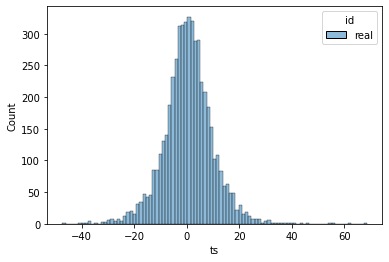

In [12]:
sns.histplot(data = real_df, x = "ts", hue = "id")

<AxesSubplot:xlabel='ts'>

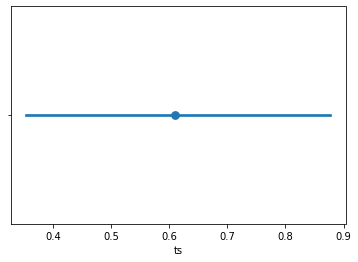

In [21]:
sns.pointplot(data = real_df, x = "ts", hue = "id")

In [13]:
import scipy.stats

In [14]:
scipy.stats.ttest_1samp(ts_diff, popmean = 0)

Ttest_1sampResult(statistic=4.648572007896773, pvalue=3.425917432844841e-06)

In [16]:
np.mean(ts_diff)

0.6103649414635937